In [129]:
import numpy as np
from numpy.random import rand
import csv
import h5py
import signal
import fast5
import fastq
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [130]:
"""
checks to see if gpu is working
"""
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c)) 

[[22. 28.]
 [49. 64.]]


In [131]:
"""
this function divides the length of whatever 
size the list is by 4 for a 4mer
"""
def BaseFunction(x,y): 
    return((len(x)//y),y)

In [132]:
"""
this function divides the length of whatever 
size the list is by 40 for a 40mer
"""
def SigFunction(x,y): 
    return((y),((x//y)))

In [133]:
"""
this function provides information about the array    
"""
def array_inspect(x):
    print ("Shape is",(x.shape))
    print(("Length is",len(x)))
    print(("Dimension is",x.ndim))
    print(("Total Size is",x.size))
    print(("Type is",x.dtype))
    print(("Type Name is",x.dtype.name))
    #print(("Mean is",(x).mean))

In [134]:
"""
this function normalizes the raw signal resistances
from each read by dividing by the mean(or std?)
"""
def normalize(x,y):
    z=np.divide(x,y)
    #np.savetxt("NormalizedSigArray_{}.csv".format(),(z), delimiter=",")
    return z

In [135]:
def divider(x,y):
    a=np.divide(x,y)
    return a

In [136]:
def fxnAxes(x):
    a=fig.add_axes([0.(x), 0.(x), 0.(x+1), 0.(x+1)])    
    return a

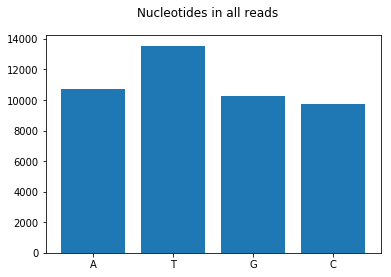

In [137]:
"""
This cell does the following
    1)Imports the bases
    2)trims off the new lines and digits
    3)converts them to a list
    4)converts them to a code of 0123 instead of ATCG
"""
f = open("fasta/sampled_read.fasta","r") #opens the file with the reads
a = f.read()
b = (a.split(">", 11))
base = [re.sub(">|\n|\d", "",str) for str in b]
baseA0 = [re.sub("A","0",str) for str in base]
baseT1 = [re.sub("T","1",str) for str in baseA0]
baseG2 = [re.sub("C","2",str) for str in baseT1]
base_coded = [re.sub("G","3",str) for str in baseG2] 
A0=(a.count("A")) 
T1=(a.count("T"))
G2=(a.count("G"))
C3=(a.count("C"))
#print(base_coded)
names = ['A', 'T', 'G', 'C']
values = [(A0), (T1), (G2), (C3)]

plt.subplot()
plt.bar(names, values)
plt.suptitle('Nucleotides in all reads')
plt.show()

In [138]:
"""
The purpose of this code is the following
1)Convert the coded reads to integer form 
2)Create an array inside the array with each read as a row
3)Create a 2D matric with the counts of all the possible scenarios 
presented in each row and the reads in each column
4)Create a 1D array with the readlengths
"""
kmer=[]
kmercount=[]
reads=[]
#readstring={}
readslength=[]
res=(len(base_coded))   
for x in range(res):
    l=list(int (i) for i in base_coded[x])
    for y in range(1):
        i=(l.count(y), l.count(y+1), l.count(y+2), l.count(y+3))
        kmercount.append(i)
        n=np.transpose(kmercount) # creates a 2D matrix with the bases counts as rows(ATGC) and the reads by columns
        kmer = n.view() #Create a view of the array with the same data
    d=np.asarray(l)
    d.resize((BaseFunction(d,4))) #Enter the list and the desired kmer for the function
    v=(str(d))
    reads.append(d) # store the reads in an array called reads
    c=len(d)
    readslength.append(c) #store the amt of kmer reads in readlength=

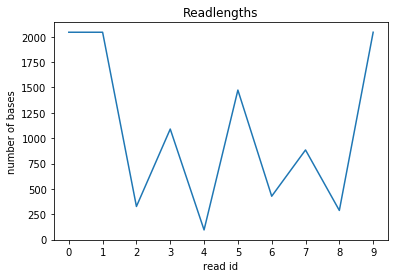

In [139]:
"""
The purpose of this code is the following
1) visualize the readlengths
"""
plt.ioff()
for i in range(1):
    plt.title("Readlengths")
    plt.ylabel('number of bases')
    plt.xlabel('read id')
    plt.plot(kmer[i])
    plt.xticks(np.arange(0, 10))
    plt.show()

In [140]:
"""
The cell does the following:
    1) Import the signal level data
    2) Normalize it to the mean fof the signal
    3) Appends the signal data from each read into a row of an array given the read count
"""
means = [] 
std = []
sig = []
for x in range(10):
    a=np.loadtxt("signal/signal_{}.txt".format(x)) # load the signal
    m=a.mean() #obtain the average signal from the read
    b=normalize(m,a) # divide each resistance by the average to normalize 
    c=b.size #obtains the number of resistance signals per read
    #print("resist",c)
    d=readslength[x] #obtains the kmers count per read
    #print("kmer",d)
    e=SigFunction(c,d) #figures out the average amount of resistances per kmer
    #print("Signal",x,"2D array size={}".format(e))
    b.resize(e) # Insert the (#bases,#sig) changes the signal level n signals wide
    #we can change this number later to be a sliding window for maching learning
    sig.append(b)
    #array_inspect(sig[x])
    #np.savetxt('sig_array.csv', b, delimiter=',')



In [141]:
"""The purpose of this cell is to merge the reads and the raw signals together
I dont really remember why I was doing this, but I am now using it to export 
the csv array into another file where I will launch tensorflow


"""

concat=[]
for x in range(10):
    a=reads[x].ndim 
    b=sig[x].ndim
    reads[(x)].astype(int) #TESTTTTT
    #print(reads[x].dtype)
    c=np.concatenate(((reads[x]),sig[x]),axis=1)
    #array_inspect(c)
    concat.append(c)
    np.savetxt("concat.csv",c, delimiter=",")

In [142]:
"""
Any cell under this cell is trash code or experimental
"""


'\nAny cell under this cell is trash code or experimental\n'

In [143]:
#print(reads[0])
#print(sig[0])
for x in range(10):
    print("Training entries: {}, labels: {}".format(len(reads[x]), len(sig[x])))

Training entries: 2078, labels: 2078
Training entries: 2078, labels: 2078
Training entries: 361, labels: 361
Training entries: 1168, labels: 1168
Training entries: 109, labels: 109
Training entries: 1444, labels: 1444
Training entries: 453, labels: 453
Training entries: 941, labels: 941
Training entries: 351, labels: 351
Training entries: 2078, labels: 2078


In [86]:
vocab_size = 256

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          4096      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [87]:
"""
I'm thinking the read identifier needs to be converted from a 2D array 
with a shape of (2078,4) to a 1D array with a shape of (2078,1) in which 
all 4 reads (ie:[0 1 2 3]) are concatenated to a single [0123] 4mer.
I am still trying to figure out how to do this, but I believe it involves 
converting the array into a string, and then concatenating the string,
then converting it back into an integer.
"""
#for x in range(1):
#    arr = reads[x]
#    arr2 = []
#    for v in (arr):
#        temp = ''
#        for w in v:
#            temp = temp + str(w)
#            arr2.append(temp)
#            arr3 = np.array(arr2)
#            reads[x]=arr3

"\nI'm thinking the read identifier needs to be converted from a 2D array \nwith a shape of (2078,4) to a 1D array with a shape of (2078,1) in which \nall 4 reads (ie:[0 1 2 3]) are concatenated to a single [0123] 4mer.\nI am still trying to figure out how to do this, but I believe it involves \nconverting the array into a string, and then concatenating the string,\nthen converting it back into an integer.\n"

In [88]:
y_val=[]
for x in range(len(reads)):
    z=[str(v) for v in reads[x]]
    c="".join(z)
    y_val.append(c)
partial_y_train = (y_val[0:100])

In [154]:
def resizer(x): # this function will resize the rows of the signal level data to the mean of the rowlengths
    b=[]
    for y in range(len(x)):
        a=(x[y]).shape
        b.append(a)
    ret=np.mean(b[y][1:2])
    for y in range(len(x)):    
        (x[y]).resize(len(x[y]),ret)
    return ret

In [155]:
resizer(sig)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [109]:
import numpy as np 
for x in range(10):
    a=insert
    #print ('First array:' )
    #print (insert)
    #print ('\n' ) 
    b = sig[x] 

    #print ('Second array:' )
    #print (b) 
    #print ('\n')  
    # both the arrays are of same dimensions 

    print ('Joining the two arrays along axis 0:' )
    np.concatenate((insert,b))
    #print ('\n' )
    print (insert.shape)
print (insert.size)
#x_val=[]
#for x in range(len(sig)):
#    print(sig[x].shape)
#    a=len(sig[x])
#    sig[x].resize(a,26)
#    np.insert(,(x))
    
#partial_x_train = (x_val[0:100])

Joining the two arrays along axis 0:


ValueError: all the input arrays must have same number of dimensions

In [76]:
print(len(x_val), len(y_val))

0 10


In [32]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 10 arrays: [array(None, dtype=object), array(None, dtype=object), array(None, dtype=object), array(None, dtype=object), array(None, dtype=object), array(None, dtype=object), array(None, dtype=object), array(None...

In [ ]:
"""
IDEA: USE AMPLICON SEQUENCING DATA TO TRAIN THE MODEL BC IT HAS A KNOWN LENGTH IN BP 
OMG USE THE PECON AMPLICON DATA BC IT IS ALL EXACTLY 3KB IN SIZE!!!!!!!!!
"""